In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn xgboost tensorflow


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\MAHAJAN\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths




  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)

   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   -----------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import pandas as pd

# Load the training data
train_series = pd.read_csv('./converted_train_series.csv')
train_events = pd.read_csv('./train_events.csv')

# Load the test data
test_series = pd.read_csv('./converted_test_series.csv')


C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_15080\3652539501.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['event'].fillna('none', inplace=True)



=== Step 1: Imputation ===
Missing values in features:
anglez            0
enmo              0
angle_diff        0
anglez_squared    0
log_enmo          0
dtype: int64


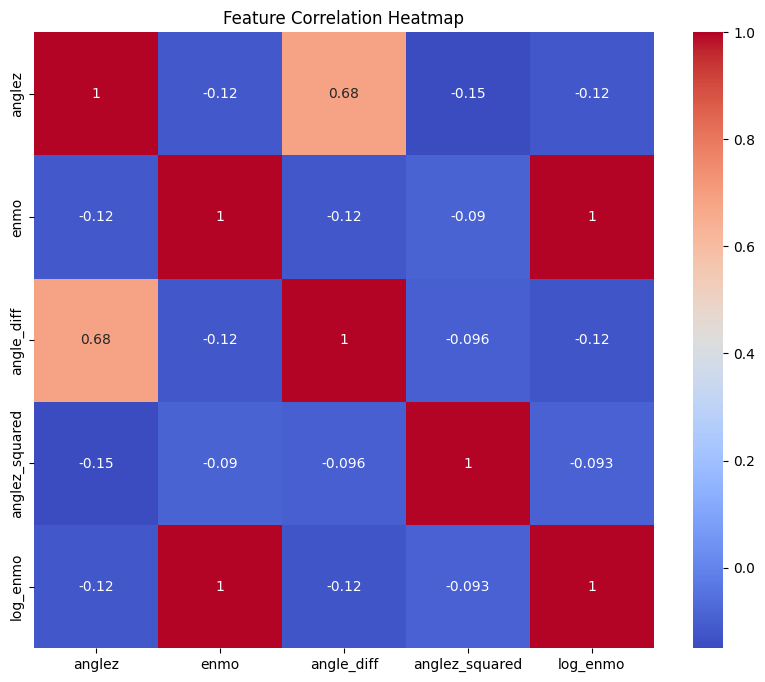

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_15080\3652539501.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[feature], shade=True, color='blue')


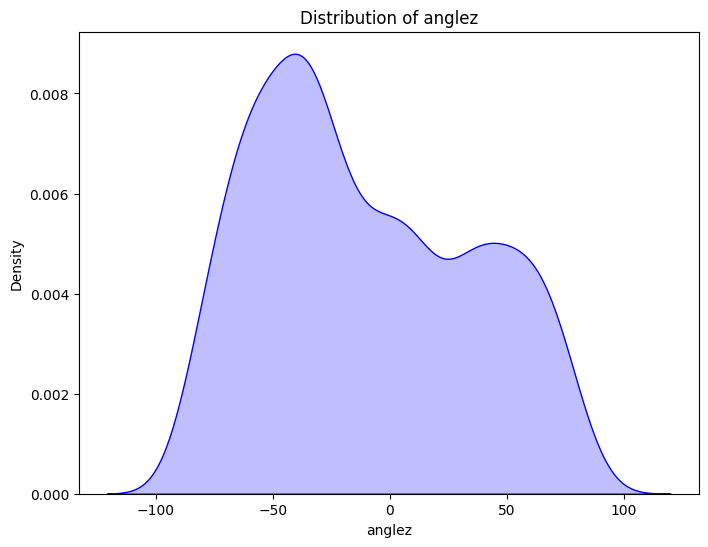

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_15080\3652539501.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[feature], shade=True, color='blue')


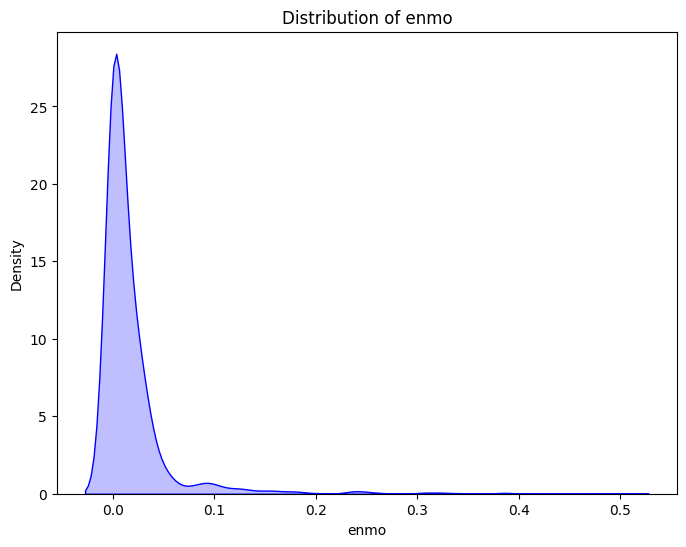

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_15080\3652539501.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[feature], shade=True, color='blue')


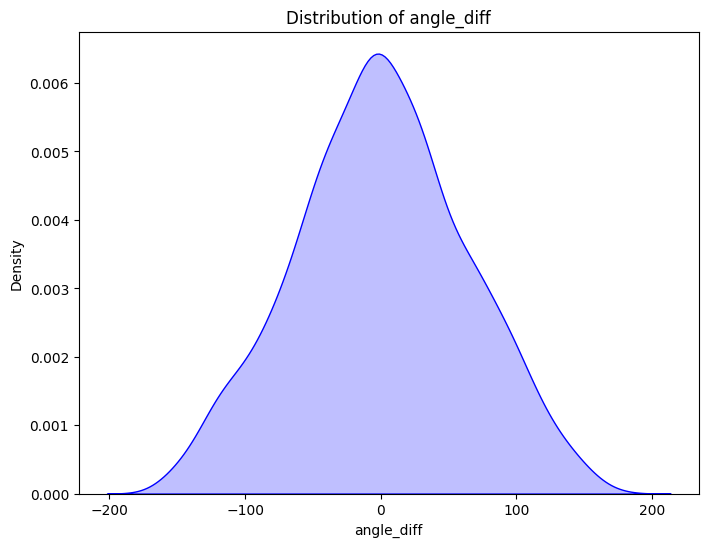

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_15080\3652539501.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[feature], shade=True, color='blue')


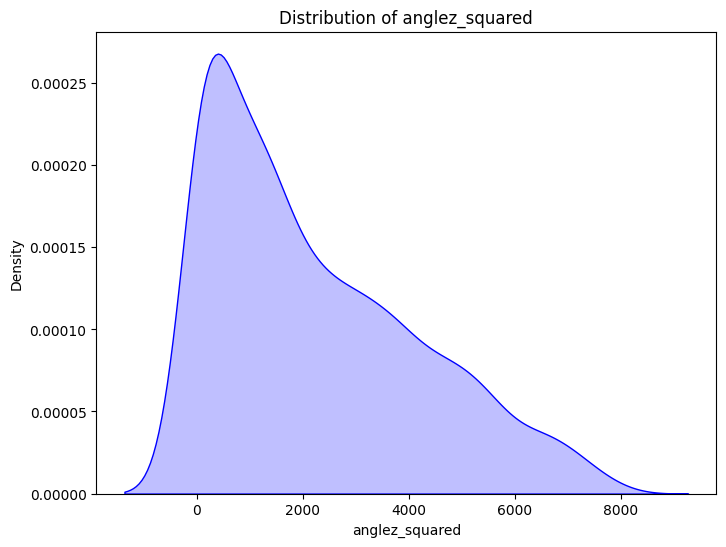

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_15080\3652539501.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[feature], shade=True, color='blue')


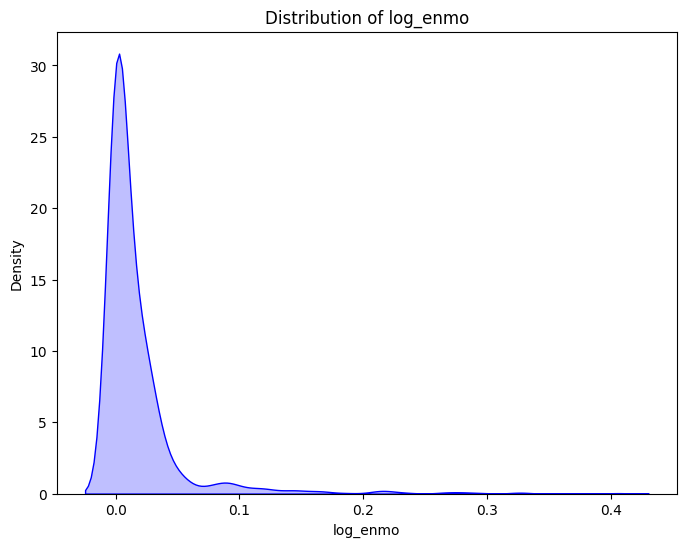

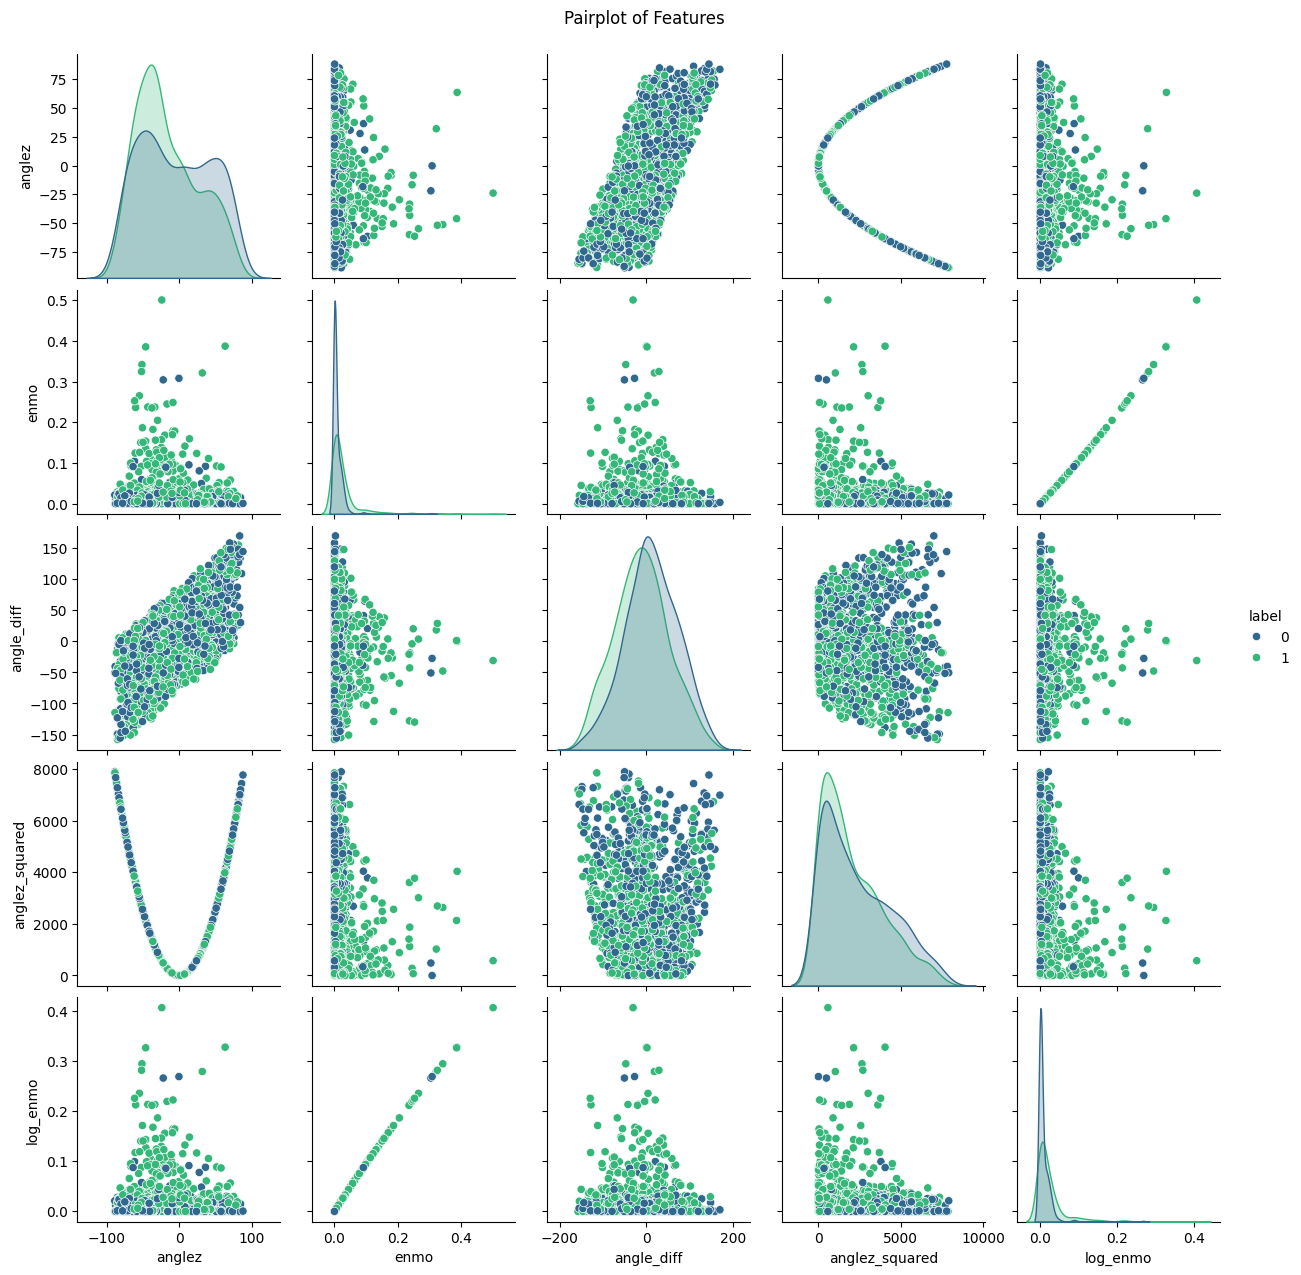


=== Step 2: Scaling ===

=== Step 3: Power Transformation ===

=== Step 4: Polynomial Feature Expansion ===

=== Step 5: Feature Selection ===
Selected features after feature selection:
['anglez' 'enmo' 'angle_diff' 'log_enmo' 'anglez enmo' 'anglez log_enmo'
 'enmo angle_diff' 'enmo log_enmo' 'angle_diff anglez_squared'
 'angle_diff log_enmo']

=== Step 6: Splitting Data ===

=== Step 7: Checking NaN or Inf values ===
Any NaN in X_train: False
Any Inf in X_train: False
Any NaN in X_val: False
Any Inf in X_val: False

Correlation matrix of features:
          0         1         2         3         4         5         6  \
0  1.000000 -0.239928  0.678886 -0.241066 -0.149848 -0.148888 -0.101211   
1 -0.239928  1.000000 -0.186996  0.999956 -0.104561 -0.103259 -0.114574   
2  0.678886 -0.186996  1.000000 -0.187430 -0.105545 -0.104858 -0.102508   
3 -0.241066  0.999956 -0.187430  1.000000 -0.103468 -0.102188 -0.113439   
4 -0.149848 -0.104561 -0.105545 -0.103468  1.000000  0.999953  0.6378

In [ ]:
# === STEP 0: Merge and Label ===
train_data = pd.merge(train_series, train_events, on=['series_id', 'step'], how='left')
train_data['event'].fillna('none', inplace=True)
train_data['label'] = train_data['event'].apply(lambda x: 1 if x == 'onset' else (0 if x == 'wakeup' else -1))
train_data = train_data[train_data['label'] != -1]

# === STEP 1: Select base features for preprocessing ===
base_features = ['anglez', 'enmo']
X_base = train_data[base_features]
y = train_data['label']

# === STEP 2: Impute Missing Values ===
from sklearn.impute import KNNImputer
print("\n=== Step 1: Imputation ===")
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_base)

# Put imputed data back in DataFrame for easier handling
X_imputed_df = pd.DataFrame(X_imputed, columns=base_features, index=train_data.index)

# === STEP 3: Feature Engineering (after imputation) ===
X_imputed_df['angle_diff'] = X_imputed_df['anglez'].diff().fillna(0)  # First diff is NaN, fill with 0
X_imputed_df['anglez_squared'] = X_imputed_df['anglez'] ** 2
X_imputed_df['log_enmo'] = np.log1p(X_imputed_df['enmo'])

# Final feature set
features = ['anglez', 'enmo', 'angle_diff', 'anglez_squared', 'log_enmo']
X = X_imputed_df[features]

# === STEP 4: Visualization BEFORE scaling ===
import seaborn as sns
import matplotlib.pyplot as plt

# Missing values check
print("Missing values in features:")
print(X.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature distributions
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(X[feature], shade=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.show()

# Pairplot
X['label'] = y.values  # Add label temporarily for pairplot
sns.pairplot(X, hue='label', palette='viridis')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()
X.drop('label', axis=1, inplace=True)  # Drop again

# === STEP 5: Preprocessing Pipeline ===
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

# Scaling
print("\n=== Step 2: Scaling ===")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Power Transformation
print("\n=== Step 3: Power Transformation ===")
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X_scaled)

# Polynomial Feature Expansion
print("\n=== Step 4: Polynomial Feature Expansion ===")
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

# Feature Selection
print("\n=== Step 5: Feature Selection ===")
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_poly, y)

# Feature names
feature_names = poly.get_feature_names_out(features)
selected_features = feature_names[selector.get_support()]
print("Selected features after feature selection:")
print(selected_features)

# === STEP 6: Train-Test Split ===
print("\n=== Step 6: Splitting Data ===")
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# === STEP 7: Check for NaN or Inf ===
import numpy as np
print("\n=== Step 7: Checking NaN or Inf values ===")
print("Any NaN in X_train:", np.any(np.isnan(X_train)))
print("Any Inf in X_train:", np.any(np.isinf(X_train)))
print("Any NaN in X_val:", np.any(np.isnan(X_val)))
print("Any Inf in X_val:", np.any(np.isinf(X_val)))

# === STEP 8: Optional Correlation Check ===
import pandas as pd
corr_matrix = pd.DataFrame(X_train).corr()
print("\nCorrelation matrix of features:")
print(corr_matrix)


In [ ]:
print(train_data.columns.tolist())


['series_id', 'step', 'timestamp_x', 'anglez', 'enmo', 'awake', 'night', 'event', 'timestamp_y', 'label', 'angle_diff', 'anglez_squared', 'log_enmo']


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight  # <-- ADD THIS

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# === SETUP ===
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# === CLASS WEIGHTS ===
print("\n=== Step 8: Computing Class Weights ===")
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

# === COMBINED SCORING FUNCTION ===
def combined_scorer(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    return 0.7 * f1 + 0.3 * acc

# === DEFINE MODELS ===
def define_models(class_weight_dict):
    return {
        'XGBoost': (XGBClassifier(random_state=42, eval_metric='logloss', tree_method='gpu_hist'), {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [3, 5, 7, 9, 11],
            'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
            'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
            'gamma': [0, 0.1, 0.2, 0.3, 0.4],
            'min_child_weight': [1, 3, 5],
            'scale_pos_weight': [class_weight_dict[1]/class_weight_dict[0]]
        }),
        'SVM': (SVC(probability=True, random_state=42), {
            'C': np.logspace(-2, 2, 8),  # Reduced
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto'],
            'class_weight': [class_weight_dict, 'balanced']
        }),
        'Logistic Regression': (LogisticRegression(random_state=42, max_iter=2000), {
            'C': np.logspace(-2, 2, 8),  # Reduced
            'penalty': ['l1', 'l2'],
            'solver': ['saga'],
            'l1_ratio': [0, 0.5, 1]  # Simplified elasticnet control
        }),
        'Random Forest': (RandomForestClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2'],
            'bootstrap': [True],
            'class_weight': ['balanced', 'balanced_subsample', class_weight_dict]
        }),
    }

# === TRAIN MODELS ===
def train_models(models, X_train, y_train, cv_splits=5, scoring=make_scorer(combined_scorer)):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    best_models = {}

    for model_name, (model, param_grid) in models.items():
        print(f"\n=== Training {model_name} with {cv_splits}-fold CV ===")
        
        search = RandomizedSearchCV(
            model, param_grid,
            n_iter=10,  # Reduced from 50 to 10
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
            random_state=42,
            verbose=2
        )
        
        search.fit(X_train, y_train)
        best_models[model_name] = search.best_estimator_
        
        # 5-fold CV evaluation
        cv_scores = cross_val_score(
            search.best_estimator_,
            X_train, y_train,
            cv=cv,
            scoring=scoring,
            n_jobs=-1
        )
        
        print(f"Best {model_name} params: {search.best_params_}")
        print(f"5-fold CV Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
        
        if hasattr(search.best_estimator_, 'feature_importances_'):
            importances = search.best_estimator_.feature_importances_
            print(f"Top 5 features: {sorted(zip(selected_features, importances), key=lambda x: x[1], reverse=True)[:5]}")
    
    return best_models

# === RUN ===
models = define_models(class_weight_dict)
best_models = train_models(models, X_train, y_train, cv_splits=5)



=== Step 8: Computing Class Weights ===
Class weights: {0: 0.9926229508196721, 1: 1.0074875207986689}

=== Training XGBoost with 5-fold CV ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost params: {'subsample': 0.6, 'scale_pos_weight': 1.0149750415973378, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 11, 'learning_rate': 0.001, 'gamma': 0.4, 'colsample_bytree': 0.6}
5-fold CV Score: 0.6373 ± 0.0309
Top 5 features: [('log_enmo', 0.20614633), ('enmo', 0.19340147), ('enmo log_enmo', 0.10932233), ('angle_diff', 0.09694943), ('anglez', 0.07341047)]

=== Training SVM with 5-fold CV ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best SVM params: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 26.826957952797247}
5-fold CV Score: 0.6299 ± 0.0216

=== Training Logistic Regression with 5-fold CV ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Logistic Regression params: {'solver': 'saga', 'penalt


=== Model Evaluation Results ===
XGBoost: F1 Score = 0.7563, Accuracy = 0.7581
SVM: F1 Score = 0.6751, Accuracy = 0.6796
Logistic Regression: F1 Score = 0.6327, Accuracy = 0.6350
Random Forest: F1 Score = 0.8846, Accuracy = 0.8852

=== Best Model: Random Forest ===


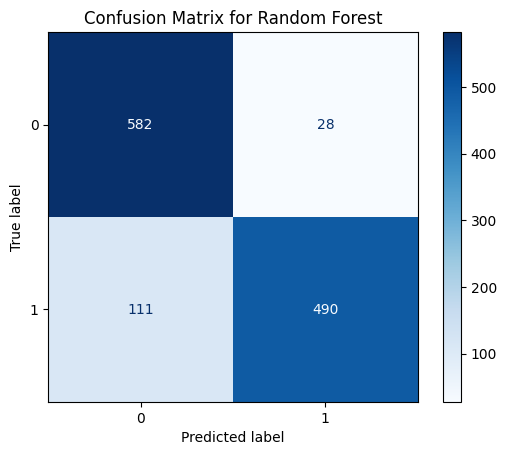


Best model saved as: random_forest_best_model.pkl


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib  # for saving the model
import matplotlib.pyplot as plt

# === EVALUATE BEST MODELS ===
def evaluate_and_save_models(best_models, X_train, y_train):
    scores = {}
    
    print("\n=== Model Evaluation Results ===")
    for model_name, model in best_models.items():
        y_pred = model.predict(X_train)
        f1 = f1_score(y_train, y_pred, average='macro')
        acc = accuracy_score(y_train, y_pred)
        scores[model_name] = (f1, acc)
        
        print(f"{model_name}: F1 Score = {f1:.4f}, Accuracy = {acc:.4f}")
    
    # Find best model by F1 Score (you can change to Accuracy if you want)
    best_model_name = max(scores, key=lambda k: scores[k][0])
    best_model = best_models[best_model_name]
    
    print(f"\n=== Best Model: {best_model_name} ===")
    
    # Confusion Matrix
    y_pred_best = best_model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    
    # Save the best model
    model_filename = f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl"
    joblib.dump(best_model, model_filename)
    print(f"\nBest model saved as: {model_filename}")

# === RUN EVALUATION ===
evaluate_and_save_models(best_models, X_train, y_train)


In [ ]:
import joblib

# Load the Random Forest model
model_filename = 'random_forest_best_model.pkl'
random_forest_model = joblib.load(model_filename)

# Print the summary of the model
print(random_forest_model)

RandomForestClassifier(class_weight={0: np.float64(0.9926229508196721),
                                     1: np.float64(1.0074875207986689)},
                       max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)


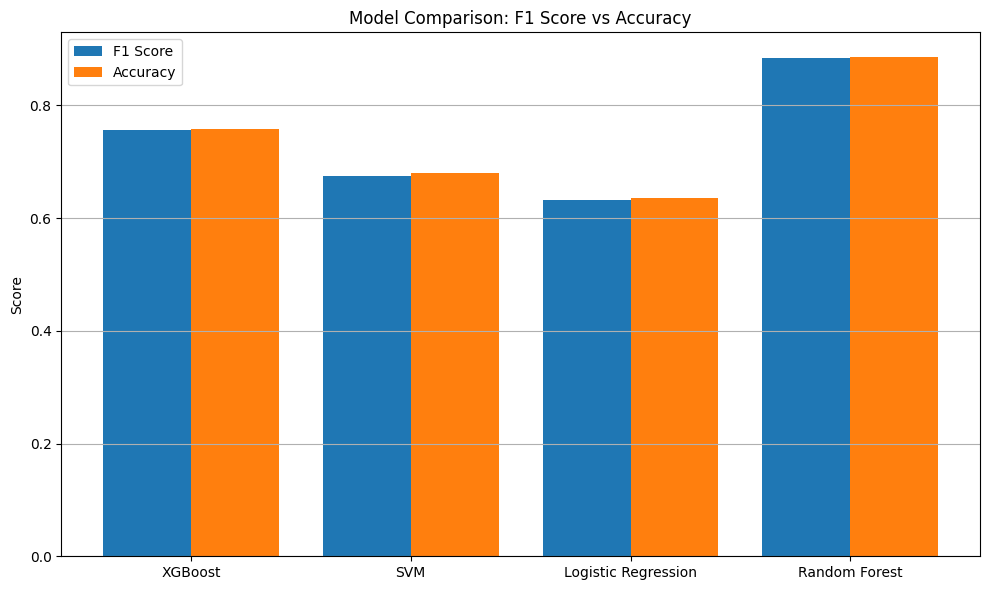

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['XGBoost', 'SVM', 'Logistic Regression', 'Random Forest']

# F1 Scores and Accuracies (from your image)
f1_scores = [0.7563, 0.6751, 0.6327, 0.8846]
accuracies = [0.7581, 0.6796, 0.6350, 0.8852]

# Plotting
x = range(len(models))  # positions of bars

plt.figure(figsize=(10, 6))

# Plot bars for F1 Score and Accuracy
plt.bar(x, f1_scores, width=0.4, label='F1 Score', align='center')
plt.bar([i + 0.4 for i in x], accuracies, width=0.4, label='Accuracy', align='center')

# Labels and title
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Score')
plt.title('Model Comparison: F1 Score vs Accuracy')
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib

# === PREPARE TEST DATA ===

test_data = test_series.copy()

test_data['angle_diff'] = test_data['anglez'].diff()
test_data['anglez_squared'] = test_data['anglez'] ** 2
test_data['log_enmo'] = np.log1p(test_data['enmo'])

X_test_features = test_data[features]
X_test_imputed = imputer.transform(X_test_features)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_poly = poly.transform(X_test_scaled)
X_test_selected = selector.transform(X_test_poly)

# === GIVE THE BEST MODEL NAME MANUALLY ===

best_model_name = 'Random Forest'  # <-- Write your best model name here that came earlier

# === LOAD THE BEST MODEL ===

best_model = joblib.load(f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl")

# === PREDICT ON TEST DATA ===

test_predictions = best_model.predict(X_test_selected)

# === CREATE SUBMISSION FILE ===

submission = pd.DataFrame({
    'row_id': range(len(test_series)),
    'series_id': test_series['series_id'],
    'step': test_series['step'],
    'event': ['onset' if pred == 1 else 'wakeup' if pred == 0 else 'none' for pred in test_predictions],
    'score': [max(prob) for prob in best_model.predict_proba(X_test_selected)] if hasattr(best_model, 'predict_proba') else [0.5] * len(test_series)
})

submission_filename = "submission_kriti_final.csv"
submission.to_csv(submission_filename, index=False)

print(f"Submission file created: {submission_filename}")


Submission file created: submission_kriti_final.csv



=== Confidence Score Summary ===
            mean    median       min       max       std
event                                                   
onset   0.633439  0.556765  0.500695  0.973900  0.148303
wakeup  0.539636  0.530763  0.500217  0.748169  0.035258

=== Visualizing Confidence Score Distributions ===


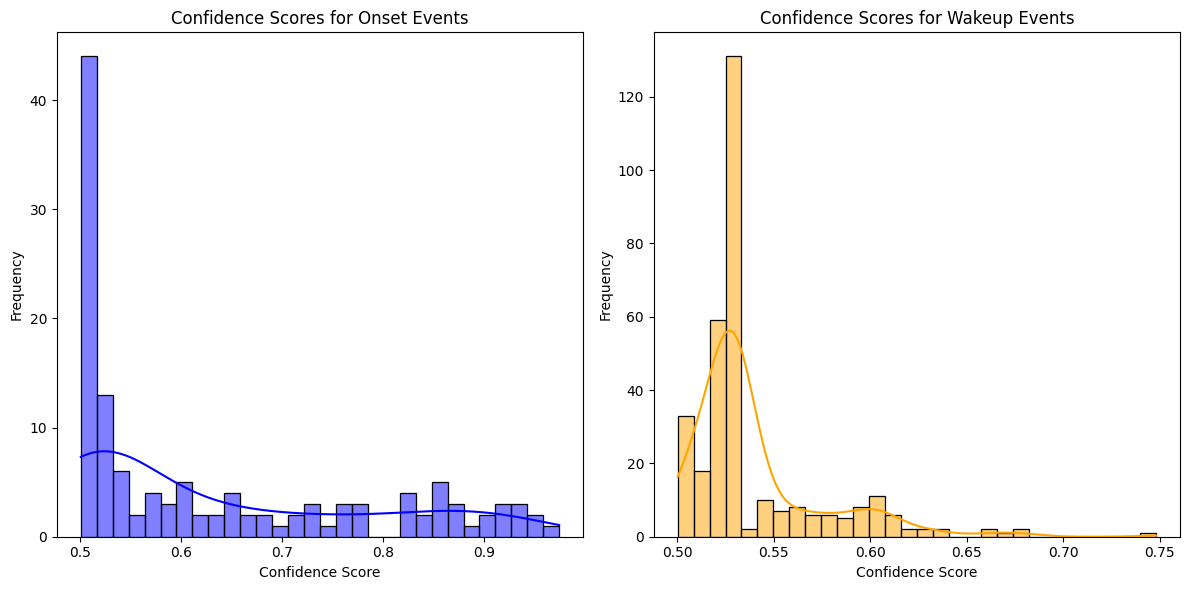

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Load Submission File ===
# Assuming the submission file is already created and named 'submission_final.csv'
submission_df = pd.read_csv('submission_kriti_final.csv')

# Filter rows where the event is either 'onset' or 'wakeup'
submission_filtered = submission_df[submission_df['event'].isin(['onset', 'wakeup'])]

# === Step 2: Evaluate Confidence Scores ===
print("\n=== Confidence Score Summary ===")

# Group by event type and calculate summary statistics
confidence_summary = submission_filtered.groupby('event')['score'].agg(['mean', 'median', 'min', 'max', 'std'])
print(confidence_summary)

# === Step 3: Visualize Confidence Score Distributions ===
print("\n=== Visualizing Confidence Score Distributions ===")

plt.figure(figsize=(12, 6))

# Confidence scores for 'onset'
plt.subplot(1, 2, 1)
sns.histplot(submission_filtered[submission_filtered['event'] == 'onset']['score'], bins=30, kde=True, color='blue')
plt.title('Confidence Scores for Onset Events')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')

# Confidence scores for 'wakeup'
plt.subplot(1, 2, 2)
sns.histplot(submission_filtered[submission_filtered['event'] == 'wakeup']['score'], bins=30, kde=True, color='orange')
plt.title('Confidence Scores for Wakeup Events')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

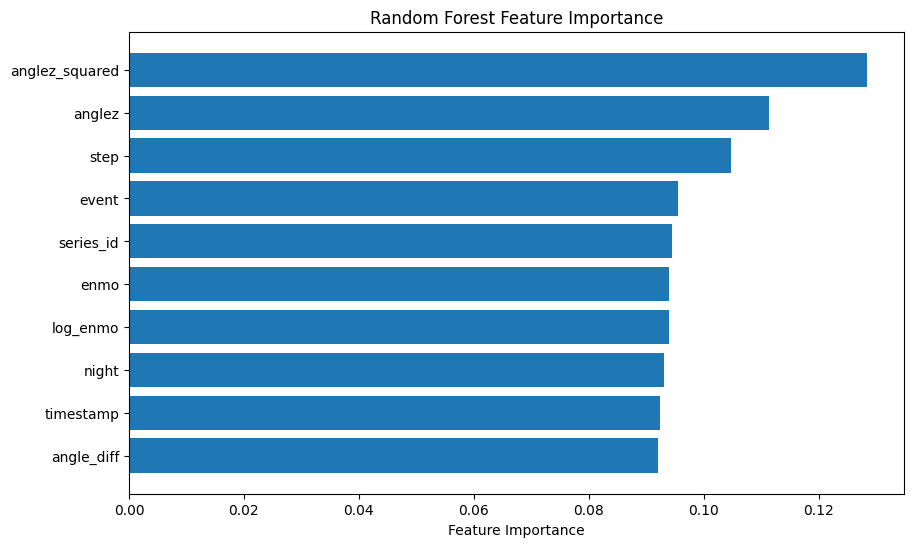

In [ ]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd

# Load the saved model
model = joblib.load("random_forest_best_model.pkl")

# If you have your feature names saved:
feature_names = ['anglez', 'angle_diff', 'anglez_squared', 'enmo','log_enmo','series_id','night','event','step','timestamp']  # replace with your actual names

# Get feature importances
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()  # Highest importance at top
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


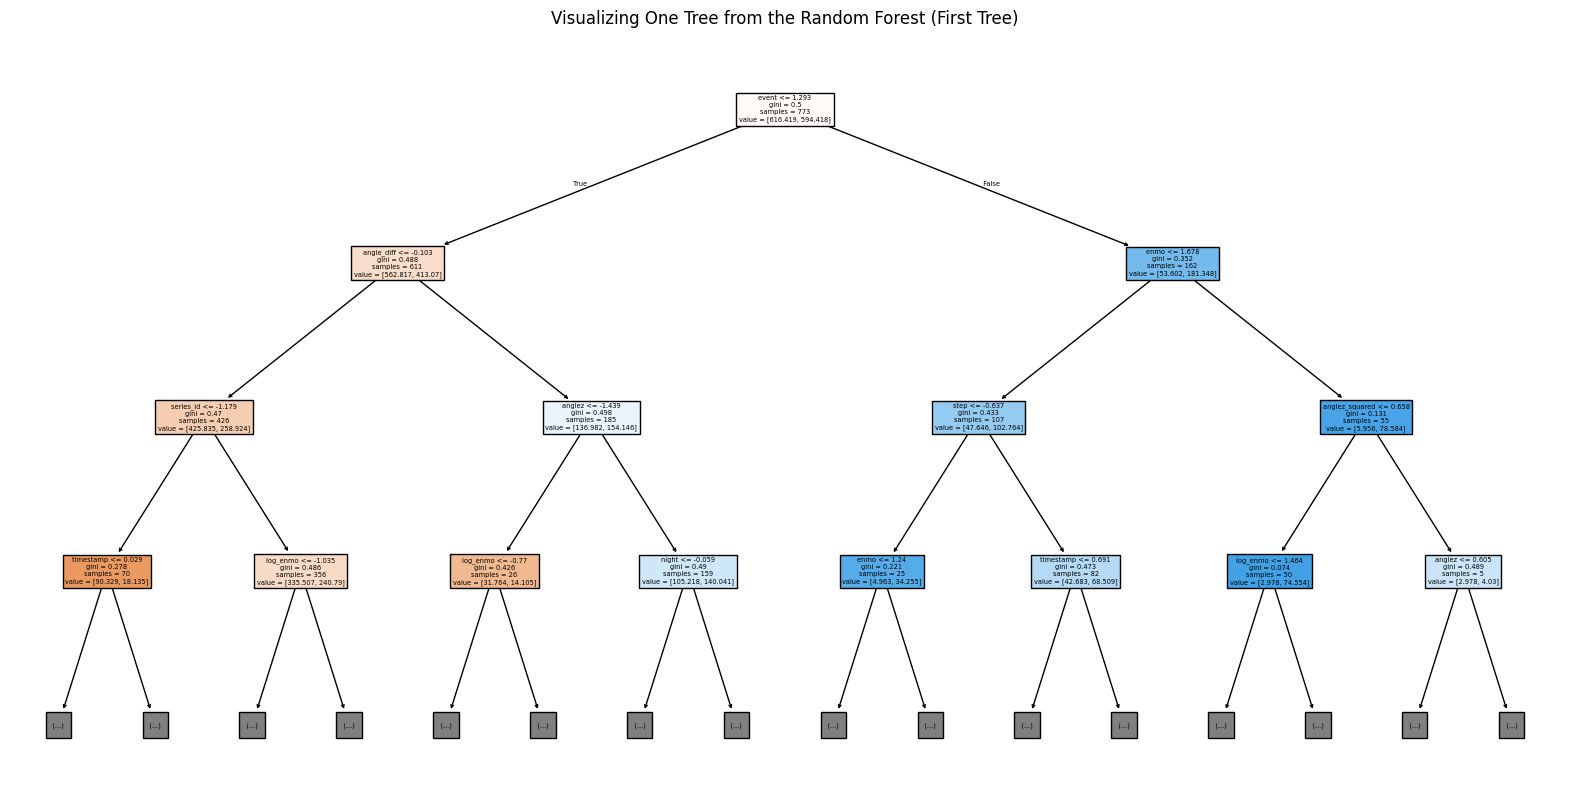

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], max_depth=3, filled=True, feature_names=feature_names)
plt.title("Visualizing One Tree from the Random Forest (First Tree)")
plt.show()


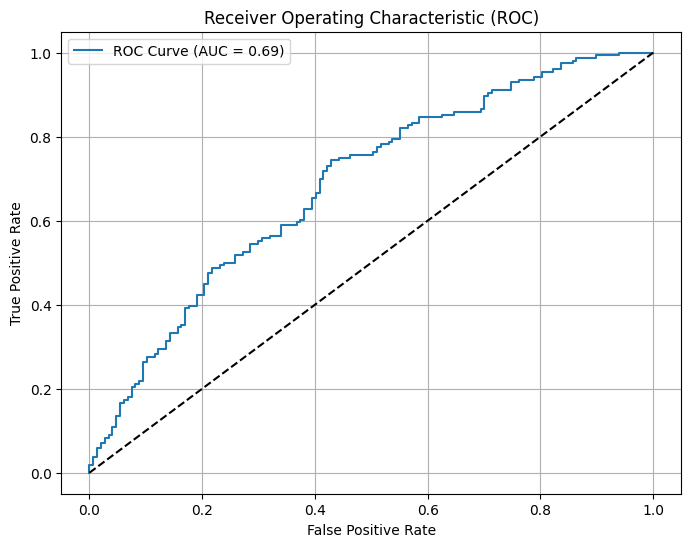

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# For binary classification
y_prob = model.predict_proba(X_val)[:, 1]  # probability for class 1
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid()
plt.show()


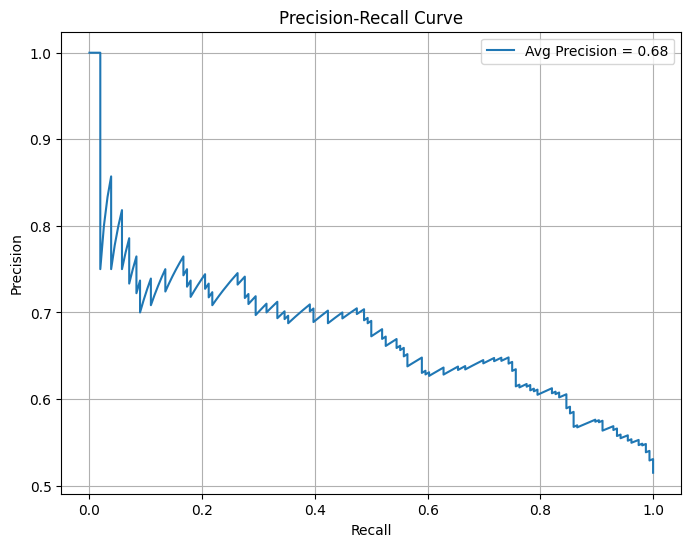

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_val, y_prob)
avg_precision = average_precision_score(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Avg Precision = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


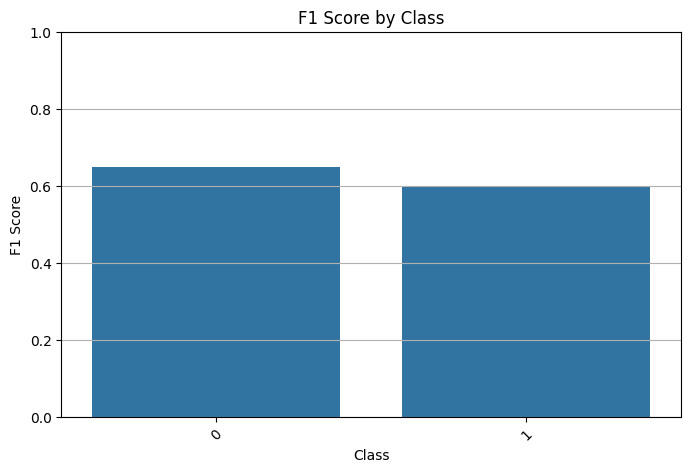

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns

# Predict and compare
y_pred = model.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot class-wise F1 score
plt.figure(figsize=(8, 5))
sns.barplot(x=df_report.index[:-3], y=df_report['f1-score'][:-3])  # skip avg rows
plt.title("F1 Score by Class")
plt.ylabel("F1 Score")
plt.xlabel("Class")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()
